In [1]:
import sys
sys.path.append('/data/GitHub/NeuroPy')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
%load_ext autoreload
%autoreload 2

import neuropy.io.miniscopeio as msio

from neuropy import core
from neuropy.io import (optitrackio,
                        dlcio,
                        )
from neuropy.io.neuroscopeio import NeuroscopeIO
from neuropy.io.binarysignalio import BinarysignalIO 
from neuropy.io.miniscopeio import MiniscopeIO
from neuropy.io.minianio import MinianIO
from neuropy.core.ca_neurons import CaNeurons
from neuropy.plotting.ca_events import RasterGroup, Raster
from neuropy.utils.signal_process import FourierSg, WaveletSg
from neuropy.plotting.signals import plot_spectrogram
from neuropy.core.signal import Spectrogram

# Make any figures saved open properly in illustrator
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"

In [2]:
# Define a class for a typical recording or set of recordings
class ProcessData:
    def __init__(self, basepath):
        basepath = Path(basepath)
        self.basepath = basepath
        xml_files = sorted(basepath.glob("*.xml"))
        assert len(xml_files) == 1, "Found more than one .xml file"
        
        fp = xml_files[0].with_suffix("")
        self.filePrefix = fp
        
        self.recinfo = NeuroscopeIO(xml_files[0])
        self.eegfile = BinarysignalIO(basepath / 'Finn_training_denoised.eeg',
                                     n_channels=self.recinfo.n_channels,
                                     sampling_rate=self.recinfo.eeg_sampling_rate,
                                     )
        try:
            self.datfile = BinarysignalIO(basepath / 'Finn_training_denoised.dat',
                                         n_channels=self.recinfo.n_channels,
                                         sampling_rate=self.recinfo.dat_sampling_rate,
                                         )
        except FileNotFoundError:
            print('No dat file found, not loading')
                
        
    def __repr__(self) -> str:
        return f"{self.__class__.__name__}({self.recinfo.source_file.name})"
    
def Finn_training():
    basepath = '/data2/Trace_FC/Recording_Rats/Finn/2022_01_20_training' # for linux desktop
    return ProcessData(basepath)

In [3]:
sess = Finn_training()
print(sess.recinfo)
print(sess.eegfile)

filename: /data2/Trace_FC/Recording_Rats/Finn/2022_01_20_training/Finn_training_denoised.xml 
# channels: 35
sampling rate: 30000
lfp Srate (downsampled): 1250

duration: 17303.33 seconds 
duration: 4.81 hours 



In [4]:
sess.eegfile.n_frames
sig = sess.eegfile.frame_slice(frame_start=0, frame_stop=1250*60*60, channel_indx=25)

In [5]:
fsig = FourierSg(sig)

In [6]:
fsig.traces.shape

(626, 7199)

In [41]:
wsig = WaveletSg(sig, np.logspace(0, np.log10(350), 50))

<IPython.core.display.Javascript object>


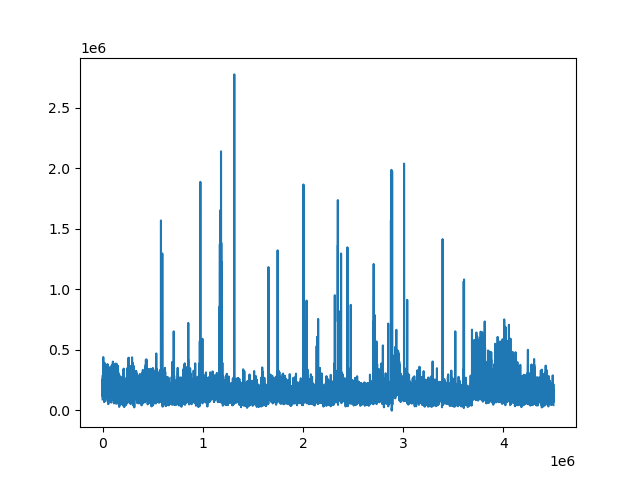

In [42]:
_, ax = plt.subplots()
ax.plot(wsig.theta)

<IPython.core.display.Javascript object>


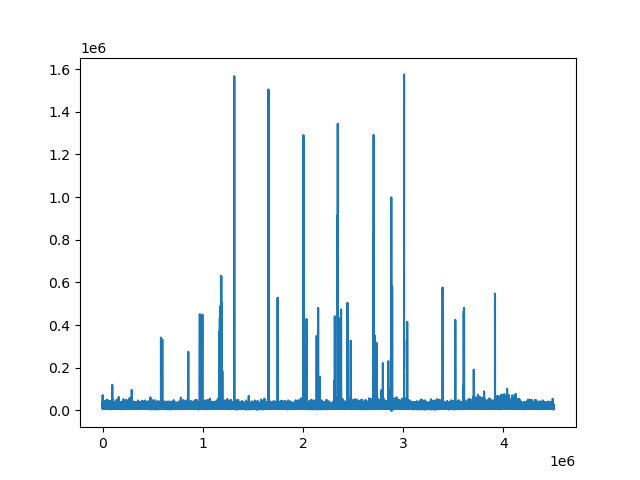

In [21]:
%matplotlib notebook
_, ax = plt.subplots()
ax.plot(wsig.gamma)

In [43]:
wsig.traces.shape

(50, 4500000)

In [ ]:
_, ax = plt.subplots()
ax.plot([1, 10, 100, 1000, 10000, ])

In [56]:
wsig.freqs

array([  1.        ,   1.1269892 ,   1.27010467,   1.43139425,
         1.61316587,   1.81802052,   2.0488895 ,   2.30907634,
         2.60230411,   2.93276864,   3.3051986 ,   3.72492314,
         4.19794817,   4.73104227,   5.33183356,   6.00891887,
         6.77198669,   7.6319559 ,   8.60113191,   9.69338281,
        10.92433778,  12.31161075,  13.87505241,  15.63703428,
        17.62276882,  19.86067022,  22.38276094,  25.22512995,
        28.42844914,  32.03855529,  36.10710594,  40.69231861,
        45.85980378,  51.68350379,  58.24675084,  65.6434594 ,
        73.97947011,  83.37406418,  93.96167028, 105.89378806,
       119.34115599, 134.49619447, 151.57575925, 170.82424436,
       192.5170793 , 216.96467009, 244.51684099, 275.56784016,
       310.56198102, 350.        ])

In [ ]:
ax.s

<IPython.core.display.Javascript object>


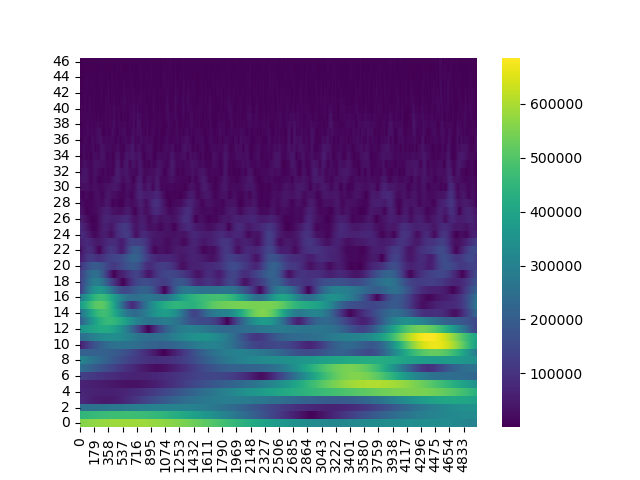

In [89]:
_, ax = plt.subplots()
start_time = 42 + 60
sns.heatmap(wsig.freq_slice(f1=1, f2=250).traces[:,(1250*start_time):(start_time + 4)*1250], cmap='viridis')
ax.invert_yaxis()
# plt.yscale('log')
#             yicklabels=[f'{_:0.1f}' for _ in np.logspace(0, np.log10(350), 50)])

In [ ]:
_, ax = plt.subplots()
sns.heatmap(fsig.traces, cmap='viridis', vmin=0, vmax=0.00005)

In [ ]:
# %matplotlib widget
plot_spectrogram(fsig.traces, [0, 360], [0, 350], freq_lim=(0, 350))